In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

# Load data from CSV file
df = pd.read_csv('fd.csv')

label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

# Split features and labels
X = df.drop(['Category'], axis=1).values
y = df['Category'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CNN

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

In [3]:
# Define neural network architecture
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])


In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
# Train the model
history=model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
a=test_acc
print('test_accuracy',test_acc)

Epoch 1/10
10/10 [==============================] - 1s 45ms/step - loss: 1.7504 - accuracy: 0.5959 - val_loss: 1.6679 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 0s 8ms/step - loss: 1.4261 - accuracy: 0.6986 - val_loss: 1.0921 - val_accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 10ms/step - loss: 1.0572 - accuracy: 0.6918 - val_loss: 1.0633 - val_accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 0s 7ms/step - loss: 0.9606 - accuracy: 0.6986 - val_loss: 0.9981 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 0.9268 - accuracy: 0.6986 - val_loss: 0.9783 - val_accuracy: 0.6667
Epoch 6/10
10/10 [==============================] - 0s 10ms/step - loss: 0.8712 - accuracy: 0.7055 - val_loss: 0.9498 - val_accuracy: 0.6667
Epoch 7/10
10/10 [==============================] - 0s 7ms/step - loss: 0.9569 - accuracy: 0.6575 - val_loss: 0.9893 - val_accuracy: 0.6970
Epoch 8/10
10/10 

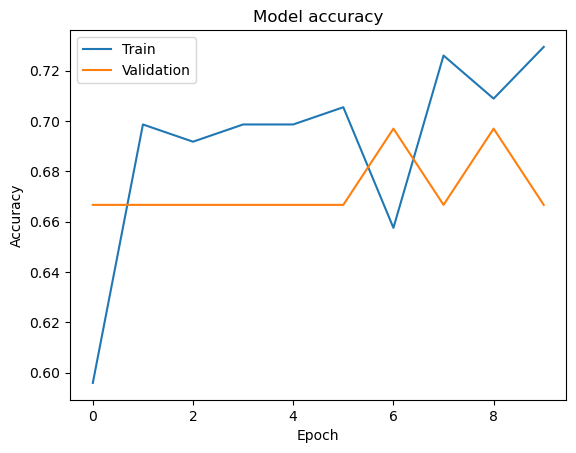

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


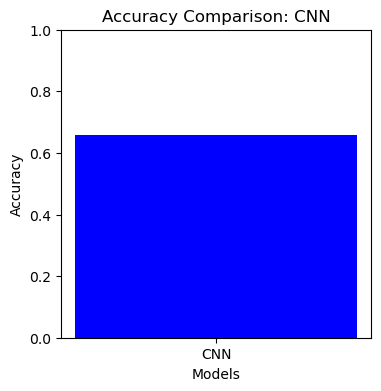

In [7]:
import matplotlib.pyplot as plt

# Sample data
label = ['CNN']
accuracies = [a]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: CNN')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()


In [8]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)


3/3 [==============================] - 0s 7ms/step
Precision: 0.46183085207475455


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.metrics import recall_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

3/3 [==============================] - 0s 3ms/step
Recall: 0.6585365853658537


In [10]:
from sklearn.metrics import f1_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

3/3 [==============================] - 0s 9ms/step
F1 Score: 0.5429156581642153


# RNN

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

In [12]:
# Reshape data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [13]:
# Define RNN architecture (using LSTM)
model = models.Sequential([
    layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(len(label_encoder.classes_), activation='softmax')
])

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
b=test_acc
print("Test accuracy:",b)

Epoch 1/10
10/10 [==============================] - 4s 92ms/step - loss: 1.2112 - accuracy: 0.6849 - val_loss: 1.0881 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 1.0114 - accuracy: 0.6986 - val_loss: 1.0659 - val_accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 0.9690 - accuracy: 0.6986 - val_loss: 1.0136 - val_accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 0s 8ms/step - loss: 0.9343 - accuracy: 0.6986 - val_loss: 0.9767 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 0s 8ms/step - loss: 0.8905 - accuracy: 0.6986 - val_loss: 0.9406 - val_accuracy: 0.6667
Epoch 6/10
10/10 [==============================] - 0s 8ms/step - loss: 0.8436 - accuracy: 0.6986 - val_loss: 0.9036 - val_accuracy: 0.6667
Epoch 7/10
10/10 [==============================] - 0s 8ms/step - loss: 0.8087 - accuracy: 0.7055 - val_loss: 0.8892 - val_accuracy: 0.6970
Epoch 8/10
10/10 [

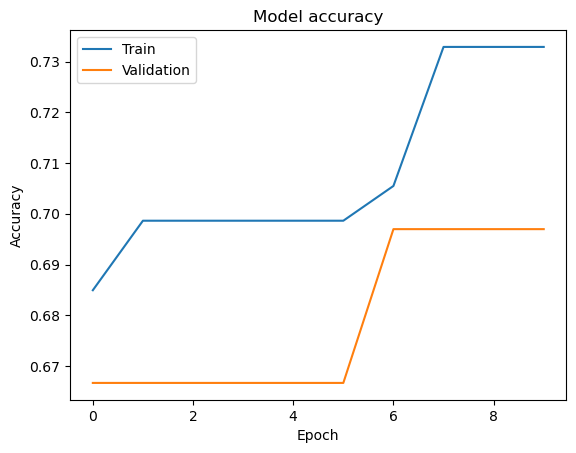

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


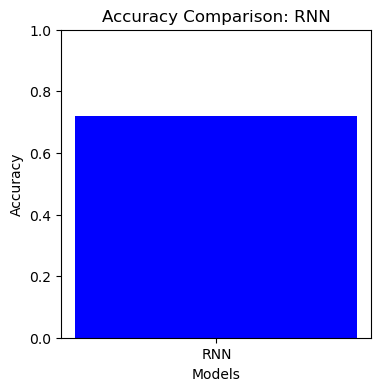

In [17]:
import matplotlib.pyplot as plt

# Sample data
label = ['RNN']
accuracies = [b]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: RNN')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()


In [18]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

3/3 [==============================] - 1s 8ms/step
Precision: 0.5350015837820716


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import recall_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

3/3 [==============================] - 0s 1ms/step
Recall: 0.7195121951219512


In [20]:
from sklearn.metrics import f1_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

3/3 [==============================] - 0s 9ms/step
F1 Score: 0.6094345051708672


# GRU

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models

In [25]:
# Reshape features for GRU input (assuming sequential data)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [26]:
# Define GRU architecture
model = models.Sequential([
    layers.GRU(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(label_encoder.classes_), activation='softmax')  # Output layer with softmax activation
])


In [27]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
c=test_acc
print("Test accuracy:", c)

Epoch 1/10
10/10 [==============================] - 4s 110ms/step - loss: 1.1680 - accuracy: 0.6267 - val_loss: 1.1419 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 1.0323 - accuracy: 0.6986 - val_loss: 1.0590 - val_accuracy: 0.6667
Epoch 3/10
10/10 [==============================] - 0s 8ms/step - loss: 0.9645 - accuracy: 0.6986 - val_loss: 1.0250 - val_accuracy: 0.6667
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.9422 - accuracy: 0.6986 - val_loss: 0.9765 - val_accuracy: 0.6667
Epoch 5/10
10/10 [==============================] - 0s 10ms/step - loss: 0.9031 - accuracy: 0.6986 - val_loss: 0.9589 - val_accuracy: 0.6667
Epoch 6/10
10/10 [==============================] - 0s 10ms/step - loss: 0.8411 - accuracy: 0.6986 - val_loss: 0.8744 - val_accuracy: 0.6667
Epoch 7/10
10/10 [==============================] - 0s 8ms/step - loss: 0.7721 - accuracy: 0.6986 - val_loss: 0.8086 - val_accuracy: 0.6667
Epoch 8/10
10/1

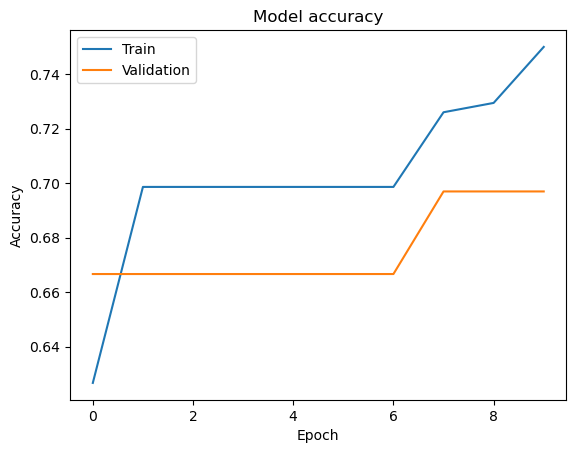

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

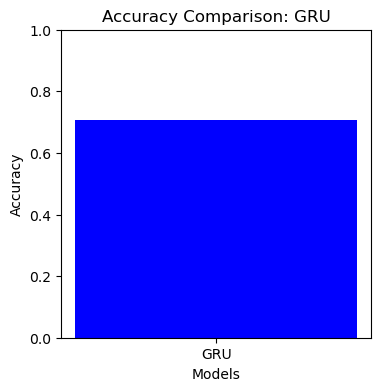

In [30]:
import matplotlib.pyplot as plt

# Sample data
label = ['GRU']
accuracies = [c]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.1)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: GRU')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()

In [31]:
from sklearn.metrics import precision_score
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels based on a threshold
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

print("Precision:", precision)

3/3 [==============================] - 1s 3ms/step
Precision: 0.5290806754221389


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
from sklearn.metrics import recall_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

print("Recall:", recall)

3/3 [==============================] - 0s 6ms/step
Recall: 0.7073170731707317


In [33]:
from sklearn.metrics import f1_score

# Assuming X_train, X_test, y_train, and y_test are defined and the model has been trained
# Make predictions on test data
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

# Compute F1 score
f1score = f1_score(y_test, y_pred, average='weighted')

print("F1 Score:", f1score)

3/3 [==============================] - 0s 8ms/step
F1 Score: 0.597339246119734


# COMPARISION MODELS

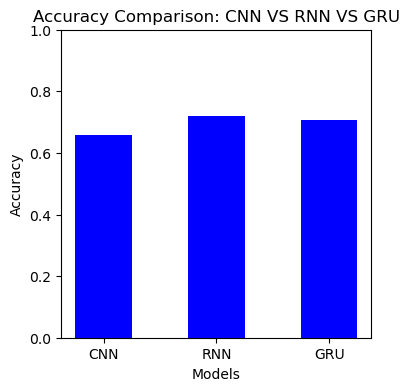

In [34]:
import matplotlib.pyplot as plt

# Sample data
label = ['CNN','RNN','GRU']
accuracies = [a,b,c]

# Adjusting figure size
plt.figure(figsize=(4, 4))  # Change width and height as needed

# Plotting the bar graph
plt.bar(label, accuracies, color=['blue'], width=0.5)  # Adjust width as needed

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: CNN VS RNN VS GRU')
plt.ylim(0.0, 1.0)  # Set the y-axis limit from 0 to 1

# Display the plot
plt.show()